GRADIENT DESCENT ON PARABOLA f(x) = (x - 3)^2 + 1
Initial point: x = 8.0
Learning rate: 0.1
True minimum: x = 3.0, f(x) = 1.0
Iteration 1: x = 7.000000, f(x) = 17.000000, gradient = 10.000000
Iteration 2: x = 6.200000, f(x) = 11.240000, gradient = 8.000000
Iteration 3: x = 5.560000, f(x) = 7.553600, gradient = 6.400000
Iteration 4: x = 5.048000, f(x) = 5.194304, gradient = 5.120000
Iteration 5: x = 4.638400, f(x) = 3.684355, gradient = 4.096000
Iteration 6: x = 4.310720, f(x) = 2.717987, gradient = 3.276800
Iteration 7: x = 4.048576, f(x) = 2.099512, gradient = 2.621440
Iteration 8: x = 3.838861, f(x) = 1.703687, gradient = 2.097152
Iteration 9: x = 3.671089, f(x) = 1.450360, gradient = 1.677722
Iteration 10: x = 3.536871, f(x) = 1.288230, gradient = 1.342177
Iteration 11: x = 3.429497, f(x) = 1.184467, gradient = 1.073742
Iteration 12: x = 3.343597, f(x) = 1.118059, gradient = 0.858993
Iteration 13: x = 3.274878, f(x) = 1.075558, gradient = 0.687195
Iteration 14: x = 3.219902, f(x) = 

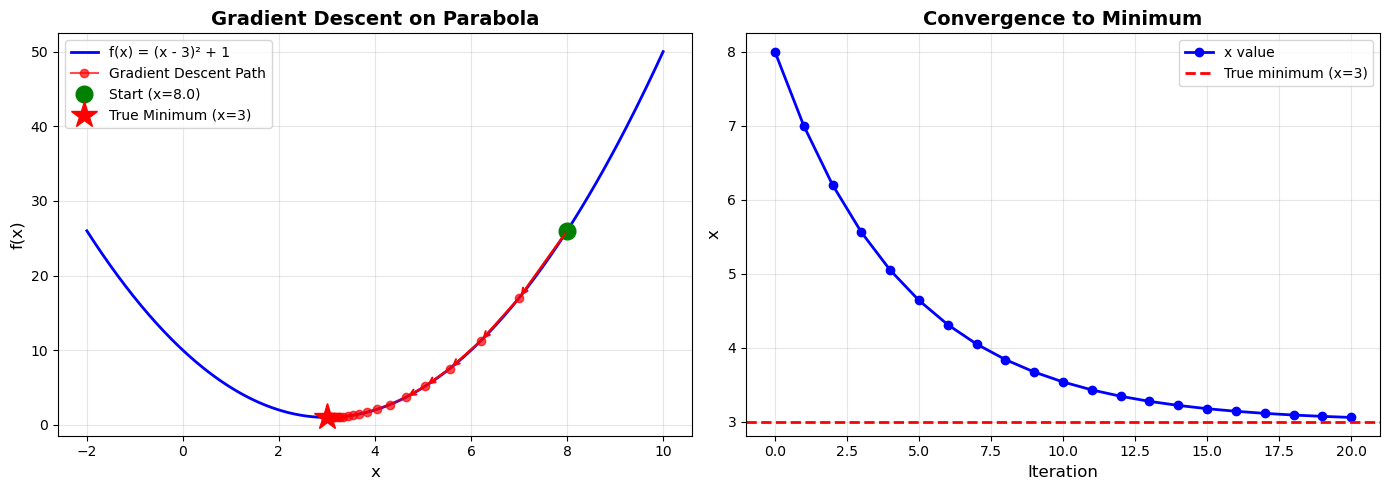


COMPARING DIFFERENT LEARNING RATES
Iteration 1: x = 7.900000, f(x) = 25.010000, gradient = 10.000000
Iteration 2: x = 7.802000, f(x) = 24.059204, gradient = 9.800000
Iteration 3: x = 7.705960, f(x) = 23.146060, gradient = 9.604000
Iteration 4: x = 7.611841, f(x) = 22.269076, gradient = 9.411920
Iteration 5: x = 7.519604, f(x) = 21.426820, gradient = 9.223682
Iteration 6: x = 7.429212, f(x) = 20.617918, gradient = 9.039208
Iteration 7: x = 7.340628, f(x) = 19.841049, gradient = 8.858424
Iteration 8: x = 7.253815, f(x) = 19.094943, gradient = 8.681255
Iteration 9: x = 7.168739, f(x) = 18.378383, gradient = 8.507630
Iteration 10: x = 7.085364, f(x) = 17.690199, gradient = 8.337478
Iteration 11: x = 7.003657, f(x) = 17.029267, gradient = 8.170728
Iteration 12: x = 6.923584, f(x) = 16.394508, gradient = 8.007314
Iteration 13: x = 6.845112, f(x) = 15.784886, gradient = 7.847167
Iteration 14: x = 6.768210, f(x) = 15.199404, gradient = 7.690224
Iteration 15: x = 6.692846, f(x) = 14.637108, gr

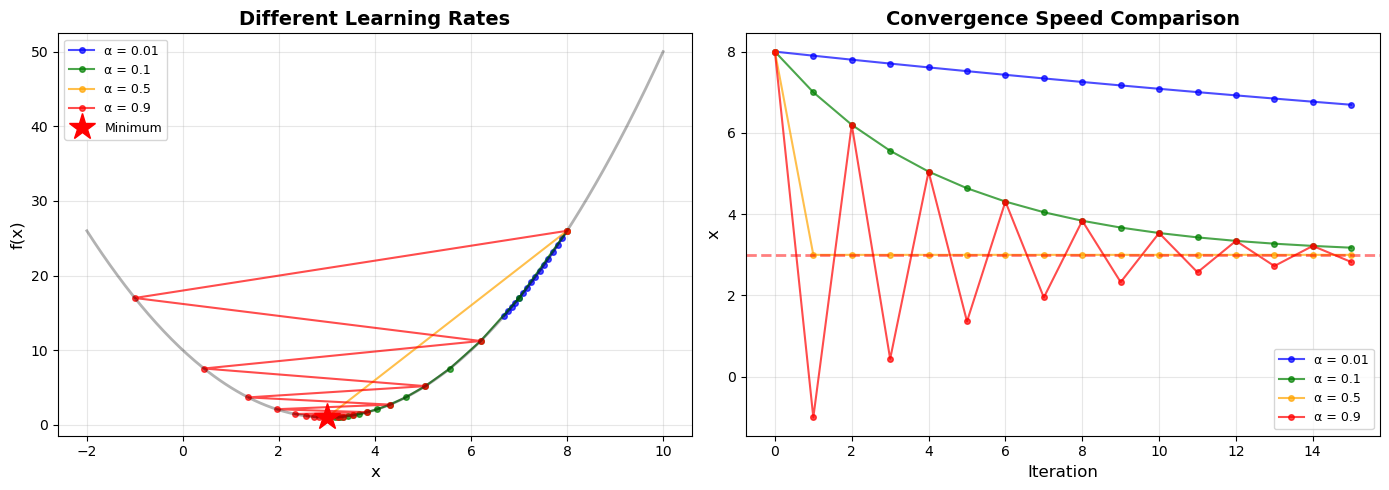

OBSERVATIONS:
- Smaller learning rates (α) converge slowly but smoothly
- Larger learning rates converge faster but may oscillate
- Learning rate too large (α > 1.0) can cause divergence


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the parabola function: f(x) = (x - 3)^2 + 1
def f(x):
    return (x - 3)**2 + 1

# Define the gradient (derivative) of f: f'(x) = 2(x - 3)
def gradient(x):
    return 2 * (x - 3)

# Gradient descent algorithm
def gradient_descent(initial_x, learning_rate, num_iterations):
    """
    Perform gradient descent to find the minimum of f(x).
    
    Parameters:
    - initial_x: Starting point
    - learning_rate: Step size (alpha)
    - num_iterations: Number of iterations to perform
    
    Returns:
    - history: List of (x, f(x)) tuples at each iteration
    """
    x = initial_x
    history = [(x, f(x))]
    
    for i in range(num_iterations):
        # Calculate gradient at current point
        grad = gradient(x)
        
        # Update x by moving in the opposite direction of the gradient
        x = x - learning_rate * grad
        
        # Store the history
        history.append((x, f(x)))
        
        print(f"Iteration {i+1}: x = {x:.6f}, f(x) = {f(x):.6f}, gradient = {grad:.6f}")
    
    return history

# Parameters
initial_x = 8.0
learning_rate = 0.1
num_iterations = 20

print("=" * 60)
print("GRADIENT DESCENT ON PARABOLA f(x) = (x - 3)^2 + 1")
print("=" * 60)
print(f"Initial point: x = {initial_x}")
print(f"Learning rate: {learning_rate}")
print(f"True minimum: x = 3.0, f(x) = 1.0")
print("=" * 60)

# Run gradient descent
history = gradient_descent(initial_x, learning_rate, num_iterations)

# Extract x and y values from history
x_history = [h[0] for h in history]
y_history = [h[1] for h in history]

print("=" * 60)
print(f"Final result: x = {x_history[-1]:.6f}, f(x) = {y_history[-1]:.6f}")
print("=" * 60)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Parabola with gradient descent path
x_range = np.linspace(-2, 10, 300)
y_range = f(x_range)

ax1.plot(x_range, y_range, 'b-', linewidth=2, label='f(x) = (x - 3)² + 1')
ax1.plot(x_history, y_history, 'ro-', markersize=6, linewidth=1.5, 
         alpha=0.7, label='Gradient Descent Path')
ax1.plot(x_history[0], y_history[0], 'go', markersize=12, 
         label=f'Start (x={initial_x})')
ax1.plot(3, 1, 'r*', markersize=20, label='True Minimum (x=3)')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('Gradient Descent on Parabola', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add arrows to show direction
for i in range(min(5, len(x_history)-1)):
    ax1.annotate('', xy=(x_history[i+1], y_history[i+1]), 
                xytext=(x_history[i], y_history[i]),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

# Plot 2: Convergence over iterations
iterations = list(range(len(x_history)))
ax2.plot(iterations, x_history, 'bo-', linewidth=2, markersize=6, label='x value')
ax2.axhline(y=3, color='r', linestyle='--', linewidth=2, label='True minimum (x=3)')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('x', fontsize=12)
ax2.set_title('Convergence to Minimum', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis: Effect of learning rate
print("\n" + "=" * 60)
print("COMPARING DIFFERENT LEARNING RATES")
print("=" * 60)

fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 5))

learning_rates = [0.01, 0.1, 0.5, 0.9]
colors = ['blue', 'green', 'orange', 'red']

for lr, color in zip(learning_rates, colors):
    history_lr = gradient_descent(initial_x, lr, 15)
    x_hist = [h[0] for h in history_lr]
    y_hist = [h[1] for h in history_lr]
    
    # Plot on parabola
    ax3.plot(x_hist, y_hist, 'o-', color=color, linewidth=1.5, 
             markersize=4, alpha=0.7, label=f'α = {lr}')
    
    # Plot convergence
    ax4.plot(range(len(x_hist)), x_hist, 'o-', color=color, 
             linewidth=1.5, markersize=4, alpha=0.7, label=f'α = {lr}')
    print()

# Configure comparison plots
ax3.plot(x_range, y_range, 'k-', linewidth=2, alpha=0.3)
ax3.plot(3, 1, 'r*', markersize=20, label='Minimum')
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('f(x)', fontsize=12)
ax3.set_title('Different Learning Rates', fontsize=14, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

ax4.axhline(y=3, color='r', linestyle='--', linewidth=2, alpha=0.5)
ax4.set_xlabel('Iteration', fontsize=12)
ax4.set_ylabel('x', fontsize=12)
ax4.set_title('Convergence Speed Comparison', fontsize=14, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 60)
print("OBSERVATIONS:")
print("- Smaller learning rates (α) converge slowly but smoothly")
print("- Larger learning rates converge faster but may oscillate")
print("- Learning rate too large (α > 1.0) can cause divergence")
print("=" * 60)